<a href="https://colab.research.google.com/github/yuvrajsingh2428/EV-Vehivles-/blob/main/Customer_Shopping_Trends_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
shopping_trends = pd.read_csv("/content/drive/MyDrive/dataset/shopping_trends_updated.csv")
df = pd.DataFrame(shopping_trends)
print(shopping_trends.shape)
df.head()

(3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


1. What are the most popular items/categories being purchased in our store?

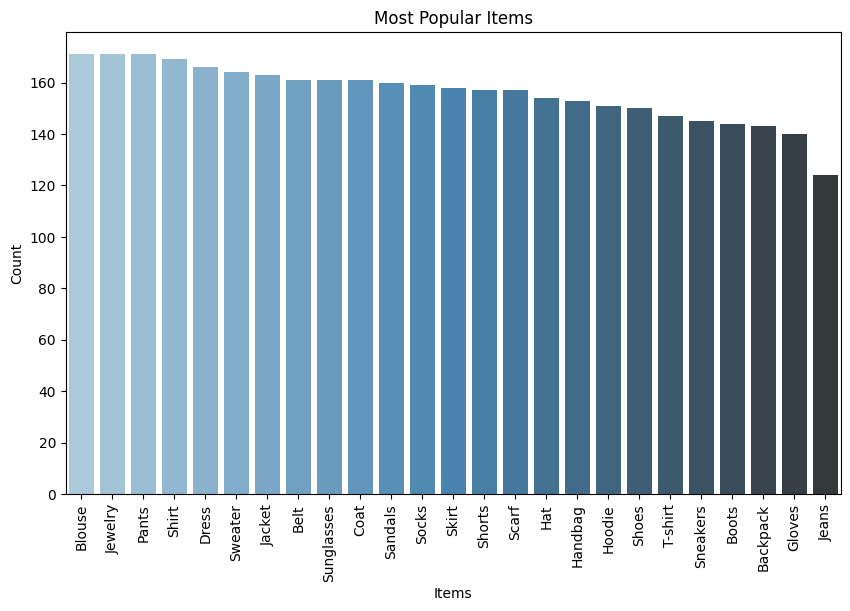

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

popular_items = df['Item Purchased'].value_counts().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_items, x='index', y='Count', palette='Blues_d')  # Use 'index' as x and 'Count' as y
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Most Popular Items')
plt.xticks(rotation=90)
plt.show()


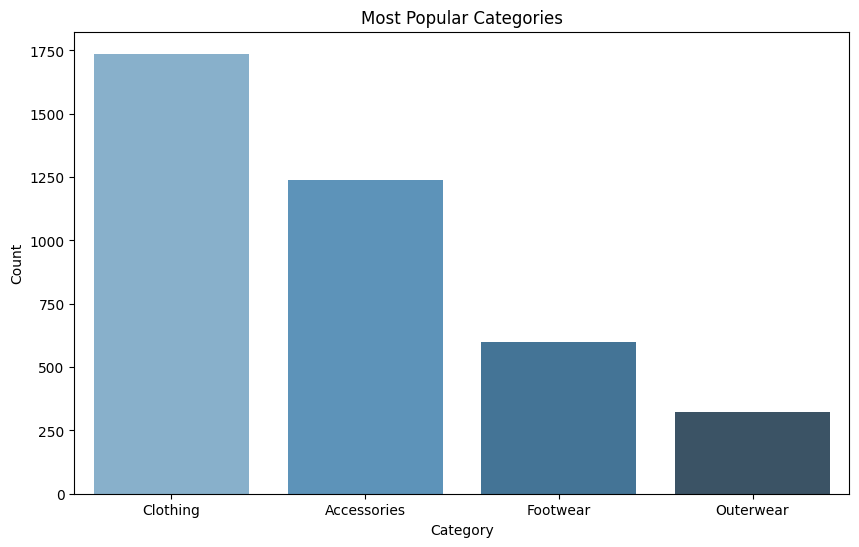

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

popular_categories = df['Category'].value_counts().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_categories, x='index', y='Count', palette='Blues_d')  # Use 'index' as x and 'Count' as y
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Most Popular Categories')
plt.xticks(rotation=0)
plt.show()


2. Can you identify any trends in customer age groups and their purchase preferences?

In [10]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,51-60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,41-50
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,51-60
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,41-50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,41-50


In [11]:
# Group by Age Group and Item Purchased
age_group_item_counts = df.groupby(['Age Group', 'Item Purchased']).size().reset_index(name='Count')
# Group by Age Group and Category
age_group_category_counts = df.groupby(['Age Group', 'Category']).size().reset_index(name='Count')

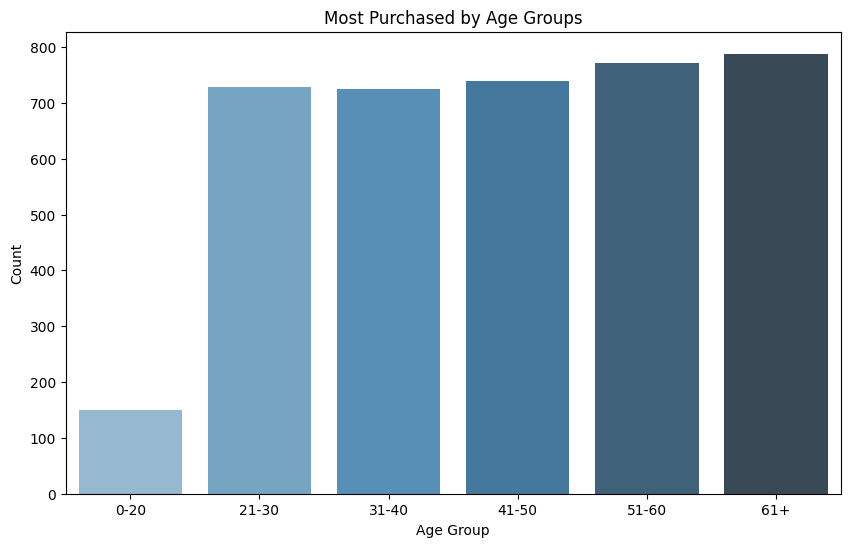

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

popular_age_groups = df['Age Group'].value_counts().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=popular_age_groups, x='index', y='Count', palette='Blues_d')  # Use 'index' as x and 'Count' as y
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Most Purchased by Age Groups')
plt.xticks(rotation=0)
plt.show()


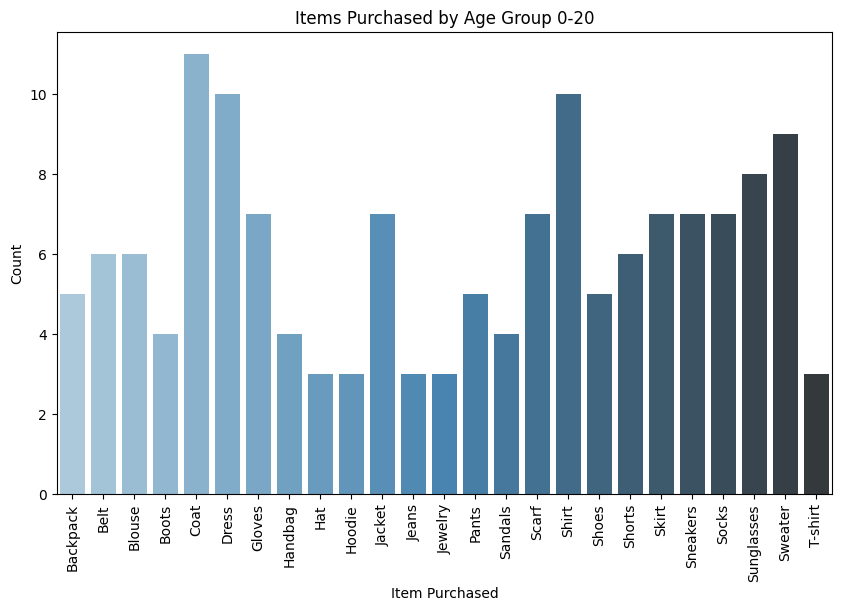

In [14]:
age_group_data = age_group_item_counts[age_group_item_counts['Age Group'] == '0-20']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_data, x='Item Purchased', y='Count', palette='Blues_d', estimator=sum)
# plt.bar(age_group_data['Item Purchased'], age_group_data['Count'])
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Items Purchased by Age Group 0-20')
plt.xticks(rotation=90)
plt.show()

**15. Are there any specific items or categories that show higher return on investment (ROI)?**




*   To calculate Return on Investment (ROI), we'll need information of cost of goods sold (COGS) and the revenue generated from each item or category.
*  where, ROI= (NetProfit / CostofGoodsSold) × 100

*  To Calculate Net profit we need Revenue generated data for every product and Cost of good Soft column.

*  where, Net Profit = Revenue - (COGS + Additional Cost)
*   Additional Cost like shipping cost or any other charges, here shipping cost is not mentioned so ignoring it for now.











So for calculating Net Profile, we first require Reveue which can't be directly calculated. However, we can calculate the revenue for each individual purchase by multiplying the "Purchase Amount (USD)" with the "Previous Purchases" for each row.

In [15]:
# The reason we added 1 to 'Previous Purchases' before multiplying to include the
# revenue from the current purchase.
df['Revenue (USD)'] = df['Purchase Amount (USD)'] * (df['Previous Purchases'] + 1)

In [16]:
# Doing the same with COGS
#Assuming COGS is 40% of the sale price and multiplying it with the previous purchases (items)
cogs_percentage = 0.4

df['Estimated COGS (USD)'] = df['Purchase Amount (USD)'] * cogs_percentage * (df['Previous Purchases'] + 1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Revenue (USD),Estimated COGS (USD)
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60,795,318.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20,192,76.8
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,51-60,1752,700.8
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30,4500,1800.0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50,1568,627.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,2-Day Shipping,No,No,32,Venmo,Weekly,41-50,924,369.6
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,51-60,2058,823.2
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Standard,No,No,24,Venmo,Quarterly,41-50,825,330.0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,Express,No,No,24,Venmo,Weekly,41-50,1925,770.0




*   Below is the Purchase amount of every person, and we have multiple customers who bought the same Product.
*   Let's revise the revenue calculation to aggregate the total revenue for each product, considering all purchases made by different customers. We'll group the data by 'Item Purchased' and then calculate the total revenue for each item:


In [17]:
# Group by 'Item Purchased', count occurrences and sum the revenue
product_counts = df.groupby('Item Purchased').agg({'Item Purchased': 'count', 'Revenue (USD)': 'sum', 'Estimated COGS (USD)': 'sum', 'Purchase Amount (USD)': 'first'})

# Renaming the columns
product_counts = product_counts.rename(columns={'Item Purchased': 'Count', 'Revenue (USD)': 'Total Revenue (USD)', 'Estimated COGS (USD)': 'Total Estimated COGS (USD)'})

product_counts = product_counts.reset_index()
product_counts

,Item Purchased,Count,Total Revenue (USD),Total Estimated COGS (USD),Purchase Amount (USD)
0,Backpack,143,205102,82040.8,73
1,Belt,161,242327,96930.8,79
2,Blouse,171,286429,114571.6,53
3,Boots,144,246155,98462.0,83
4,Coat,161,254415,101766.0,97
5,Dress,166,283315,113326.0,51
6,Gloves,140,231846,92738.4,58
7,Handbag,153,228984,91593.6,31
8,Hat,154,243616,97446.4,53
9,Hoodie,151,224000,89600.0,25


So now, let's get into the process of calculating ROI as we now have both COGS and Revenue

In [18]:
# Calculate Net Profit
product_counts['Net Profit (USD)'] = product_counts['Total Revenue (USD)'] - product_counts['Total Estimated COGS (USD)']
product_counts

# Calculate ROI
product_counts['ROI (%)'] = (product_counts['Net Profit (USD)'] / product_counts['Total Estimated COGS (USD)']) * 100

# Rounding ROI to two decimal places
product_counts['ROI (%)'] = product_counts['ROI (%)']

top_roi_items = product_counts.sort_values(by='ROI (%)', ascending=False)
# top_roi_items = product_counts.nlargest(10, 'ROI (%)')

top_roi_items = top_roi_items.reset_index()
top_roi_items[['Item Purchased', 'Net Profit (USD)', 'ROI (%)']]

,Item Purchased,Net Profit (USD),ROI (%)
0,Backpack,123061.2,150.0
1,Jacket,135715.8,150.0
2,Sunglasses,147243.0,150.0
3,Sneakers,137368.2,150.0
4,Skirt,147765.0,150.0
5,Shorts,153568.2,150.0
6,Shirt,167820.0,150.0
7,Scarf,162520.2,150.0
8,Belt,145396.2,150.0
9,Jewelry,181344.0,150.0


The consistent ROI values are likely due to the fixed COGS assumption. Since the COGS is calculated as a fixed percentage (40%) of the purchase amount, and it's being applied uniformly across all products and purchases, it's resulting in a consistent ROI.

**16. Can we predict future trends in item categories that will be in demand?**

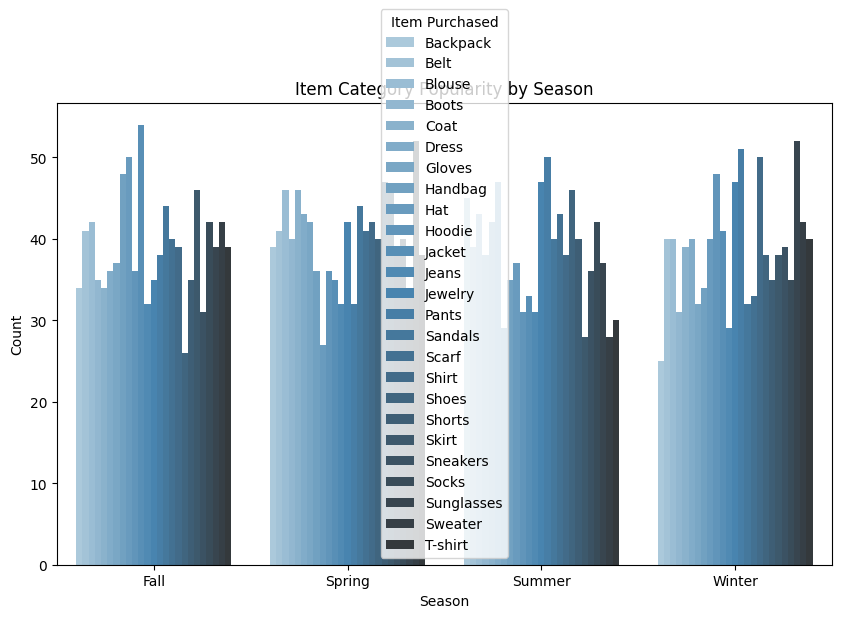

In [19]:
seasonal_item_counts = df.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Count', hue='Item Purchased', data=seasonal_item_counts, palette='Blues_d')

plt.title('Item Category Popularity by Season')
plt.xticks(rotation=0)
plt.show()

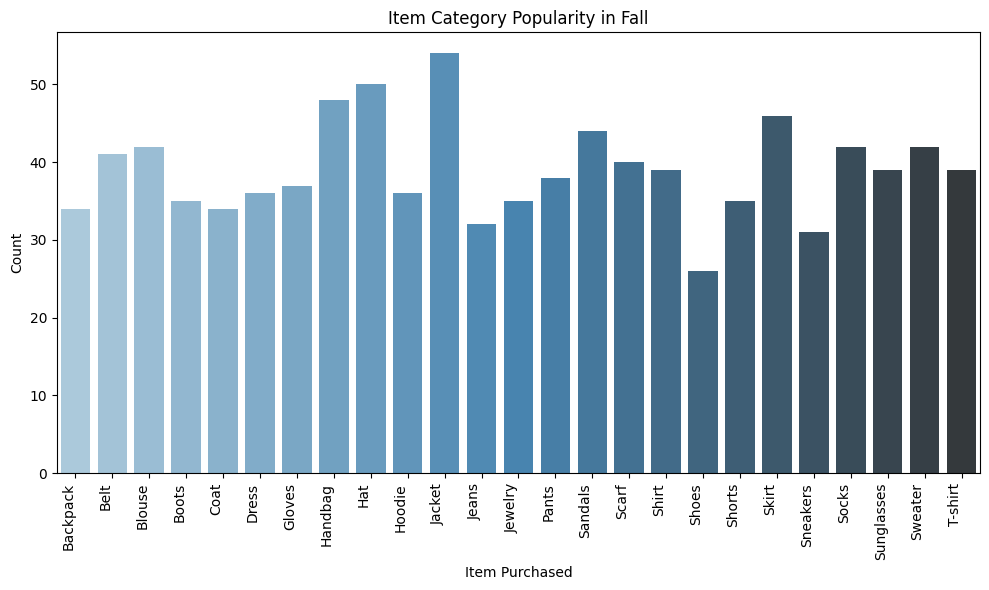

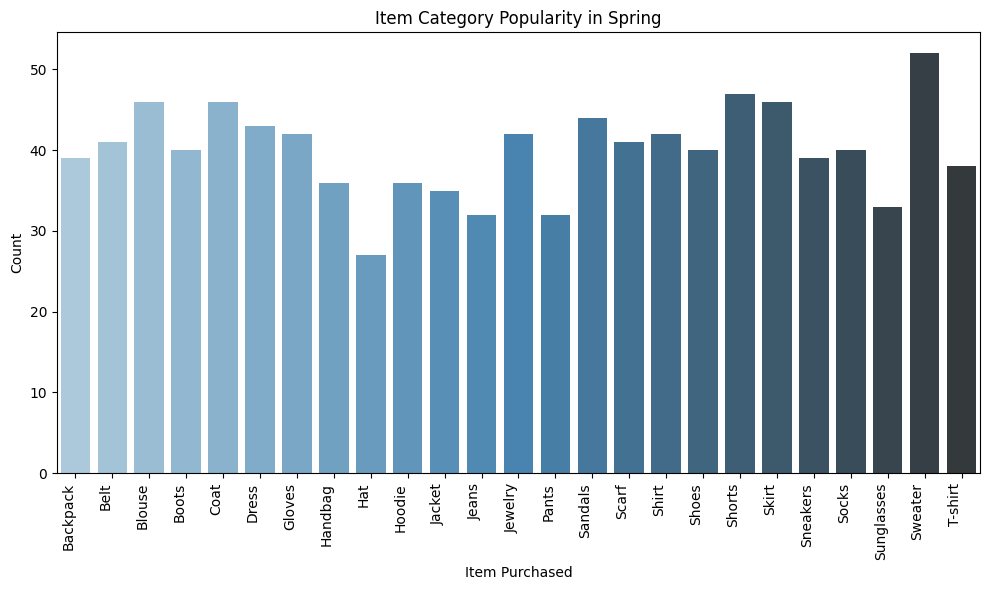

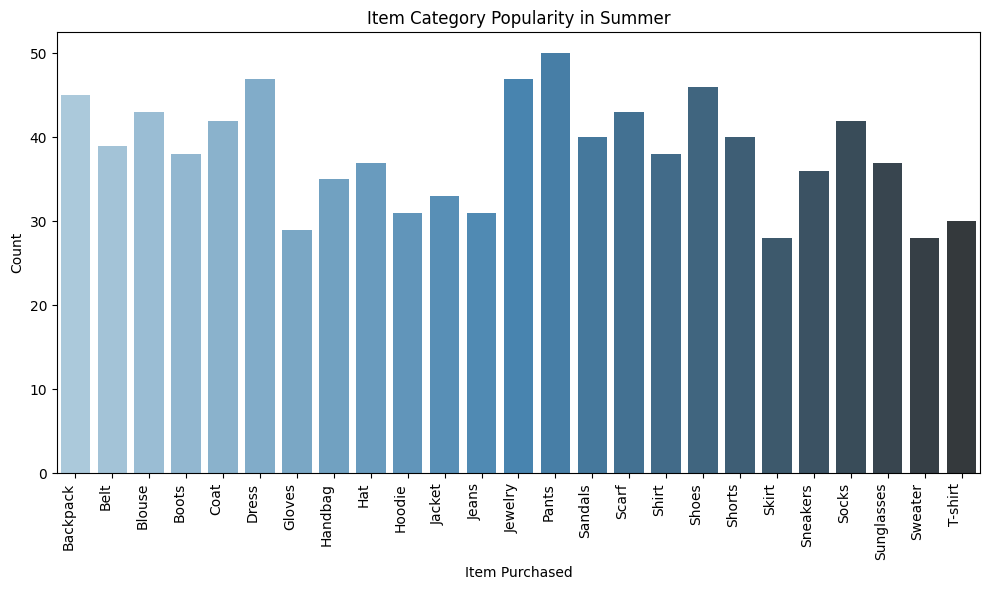

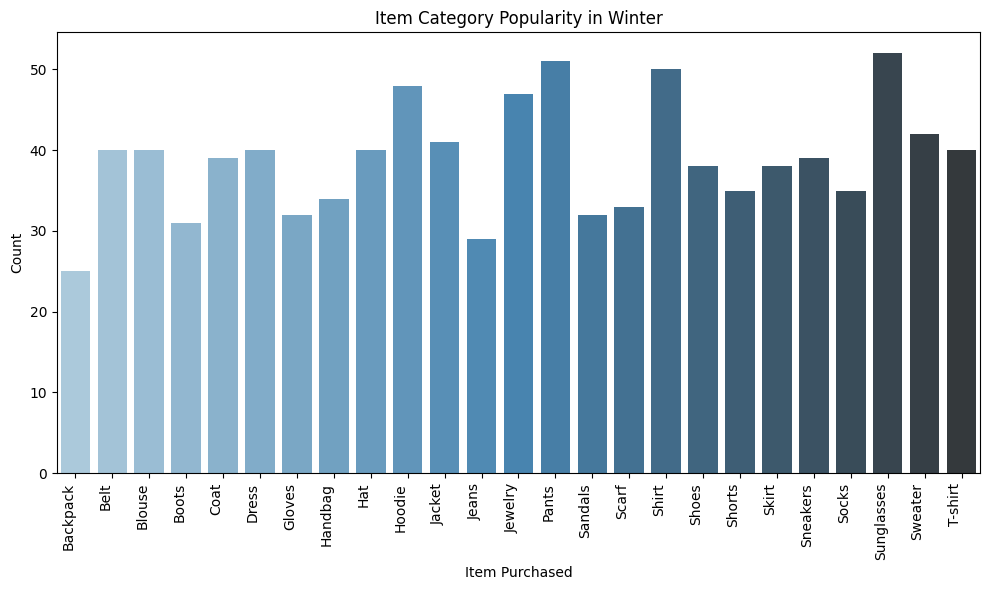

In [20]:
seasons = seasonal_item_counts['Season'].unique()

for season in seasons:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Item Purchased', y='Count', data=seasonal_item_counts[seasonal_item_counts['Season'] == season], palette='Blues_d')
    ax.set_title(f'Item Category Popularity in {season}')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()

plt.show()

In [21]:
le_item = LabelEncoder()
le_season = LabelEncoder()

df['Item Purchased Encoded'] = le_item.fit_transform(df['Item Purchased'])
df['Season Encoded'] = le_season.fit_transform(df['Season'])

In [22]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group,Revenue (USD),Estimated COGS (USD),Item Purchased Encoded,Season Encoded
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,51-60,795,318.0,2,3
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,0-20,192,76.8,23,3
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,51-60,1752,700.8,11,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,21-30,4500,1800.0,14,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,41-50,1568,627.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,No,32,Venmo,Weekly,41-50,924,369.6,9,2
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,No,41,Bank Transfer,Bi-Weekly,51-60,2058,823.2,0,1
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,No,24,Venmo,Quarterly,41-50,825,330.0,1,1
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,No,24,Venmo,Weekly,41-50,1925,770.0,17,2


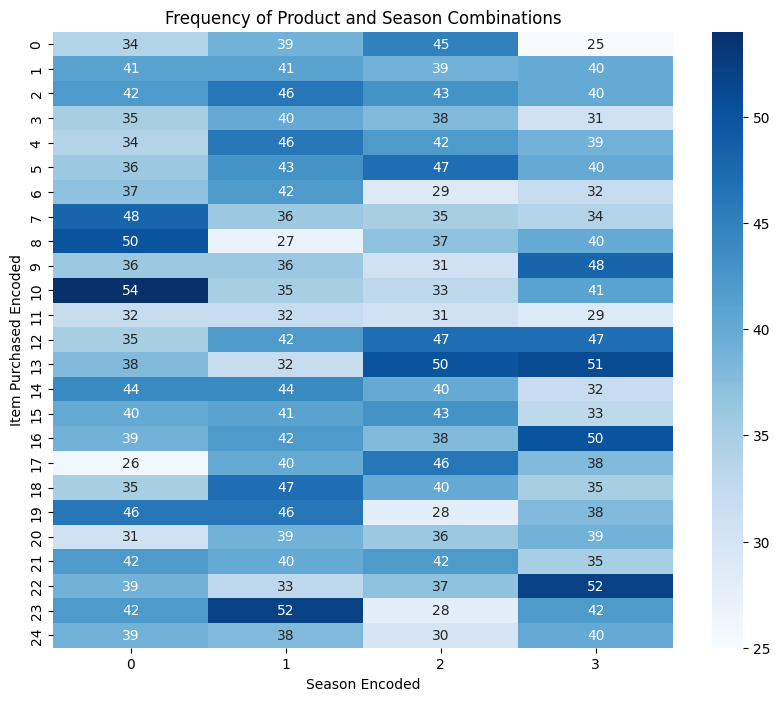

In [23]:
pivot_table = df.groupby(['Item Purchased Encoded', 'Season Encoded']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Frequency of Product and Season Combinations')
plt.xlabel('Season Encoded')
plt.ylabel('Item Purchased Encoded')
plt.show()

It's hard to find the product and selling of each items on every season, let's map the it into the real names

In [24]:
# key mapping for products and seasons
item_mapping_df = df[['Item Purchased Encoded', 'Item Purchased']].drop_duplicates()
item_mapping = dict(zip(item_mapping_df['Item Purchased Encoded'], item_mapping_df['Item Purchased']))
season_mapping_df = df[['Season Encoded', 'Season']].drop_duplicates()
season_mapping = dict(zip(season_mapping_df['Season Encoded'], season_mapping_df['Season']))

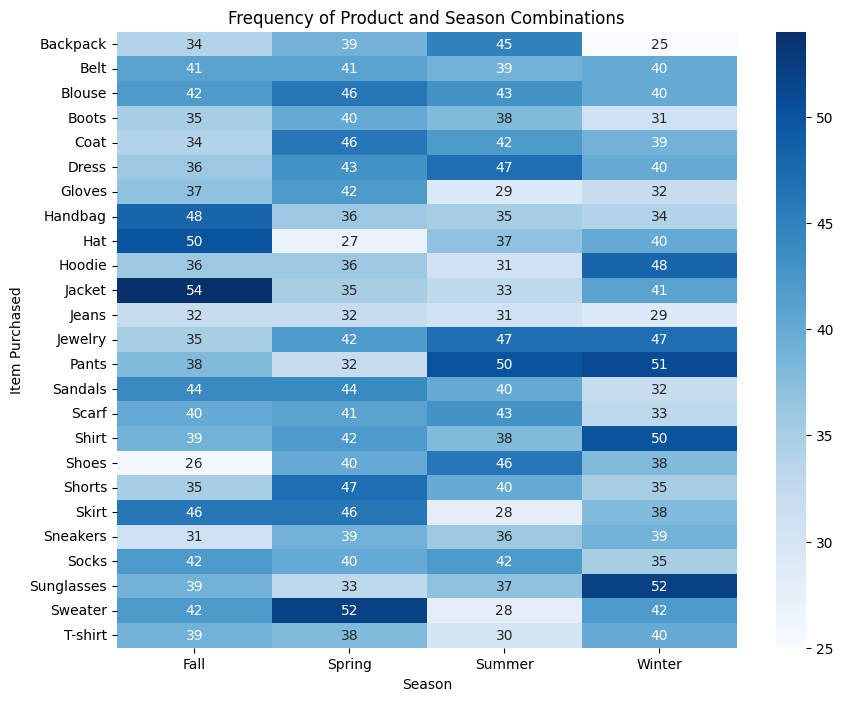

In [25]:
pivot_table = df.groupby(['Item Purchased Encoded', 'Season Encoded']).size().unstack(fill_value=0)

pivot_table.index = pivot_table.index.map(item_mapping)
pivot_table.columns = pivot_table.columns.map(season_mapping)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Frequency of Product and Season Combinations')
plt.xlabel('Season')
plt.ylabel('Item Purchased')
plt.show()